

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



**this data set is about movies where and when it was made ,genre,movie rating revenue ,budget and release year.**


Question that can analyised from this data set

   1- Movies with most and least earned revenue.
   
   2- Movies with largest and lowest budgets
   
   3- Movies which had most and least profit.
   
   4- Movies with longest and shortest runtime values
   
   5- Average runtime of all the movies.
   
   6- In which year we had most no.of budget,revenue and profitable movies.



In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
!pip install --upgrade matplotlib
!pip install --upgrade seaborn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows
#pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_columns', None)
%matplotlib inline



Requirement already up-to-date: matplotlib in /opt/conda/lib/python3.6/site-packages (3.3.4)
Requirement already up-to-date: seaborn in /opt/conda/lib/python3.6/site-packages (0.11.1)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09




### Data Cleaning (Replace this with more specific notes!)
1- useless coulmns like id,imdb_id,keywords,homepage.

2- Removing the duplicacy in the rows.

3- Replacing zero with NAN in runtime,budget,revenue coulmns.

4- Changing release date column into date format.

5- vote_count column values in different scales


In [5]:
df_copy=df.copy()

### useless coulmns like id,imdb_id,keywords,homepage.

In [6]:
df_copy=df_copy.drop(columns=['id','imdb_id','keywords','homepage'])

In [7]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 17 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
tagline                 8042 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(5), object(8)
memory usage: 1.4+ MB


### Removing the duplicacy in the rows.

In [8]:
df_copy[df_copy.duplicated()]

,popularity,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,Survival is no game,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [9]:
df_copy=df_copy.drop_duplicates()

In [10]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 17 columns):
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
tagline                 8041 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: float64(4), int64(5), object(8)
memory usage: 1.5+ MB


### Replacing zero with NAN in runtime,budget,revenue coulmns.

In [11]:
df_copy[['runtime','budget','revenue']]=df_copy[['runtime','budget','revenue']].replace(0,np.NaN)


In [12]:
df_copy.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,5.169000e+03,4.849000e+03,10834.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,3.073958e+07,8.923886e+07,102.363855,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,1.000231,3.890441e+07,1.620801e+08,30.948225,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207575,6.000000e+06,7.732325e+06,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383831,1.700000e+07,3.185308e+07,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713857,4.000000e+07,9.996575e+07,112.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [13]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 17 columns):
popularity              10865 non-null float64
budget                  5169 non-null float64
revenue                 4849 non-null float64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
tagline                 8041 non-null object
overview                10861 non-null object
runtime                 10834 non-null float64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: float64(7), int64(2), object(8)
memory usage: 1.5+ MB


### Changing release date column into date format.

In [14]:
df_copy.release_date=pd.to_datetime(df_copy.release_date)

In [15]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 17 columns):
popularity              10865 non-null float64
budget                  5169 non-null float64
revenue                 4849 non-null float64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
tagline                 8041 non-null object
overview                10861 non-null object
runtime                 10834 non-null float64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(2), object(7)
memory usage: 1.5+ MB


### dropping vote_count

In [16]:
df_copy=df_copy.drop(columns=['vote_count'])

In [17]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
popularity              10865 non-null float64
budget                  5169 non-null float64
revenue                 4849 non-null float64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
tagline                 8041 non-null object
overview                10861 non-null object
runtime                 10834 non-null float64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(1), object(7)
memory usage: 1.4+ MB


### dropping rows with NaN

In [18]:
df_copy=df_copy.dropna()

In [19]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3544 entries, 0 to 10848
Data columns (total 16 columns):
popularity              3544 non-null float64
budget                  3544 non-null float64
revenue                 3544 non-null float64
original_title          3544 non-null object
cast                    3544 non-null object
director                3544 non-null object
tagline                 3544 non-null object
overview                3544 non-null object
runtime                 3544 non-null float64
genres                  3544 non-null object
production_companies    3544 non-null object
release_date            3544 non-null datetime64[ns]
vote_average            3544 non-null float64
release_year            3544 non-null int64
budget_adj              3544 non-null float64
revenue_adj             3544 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(1), object(7)
memory usage: 470.7+ KB


<a id='eda'></a>
## Exploratory Data Analysis





## relation between variables

In [20]:
#corelation between variables
df_copy.corr()

,popularity,budget,revenue,runtime,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.437312,0.609043,0.226962,0.328669,0.180260,0.388925,0.540474
budget,0.437312,1.000000,0.685282,0.271086,0.027875,0.285932,0.958270,0.527026
revenue,0.609043,0.685282,1.000000,0.264340,0.236722,0.149497,0.654895,0.899965
runtime,0.226962,0.271086,0.264340,1.000000,0.371213,-0.109724,0.345953,0.295674
vote_average,0.328669,0.027875,0.236722,0.371213,1.000000,-0.135451,0.041022,0.277922
release_year,0.180260,0.285932,0.149497,-0.109724,-0.135451,1.000000,0.092849,-0.096808
budget_adj,0.388925,0.958270,0.654895,0.345953,0.041022,0.092849,1.000000,0.565572
revenue_adj,0.540474,0.527026,0.899965,0.295674,0.277922,-0.096808,0.565572,1.000000


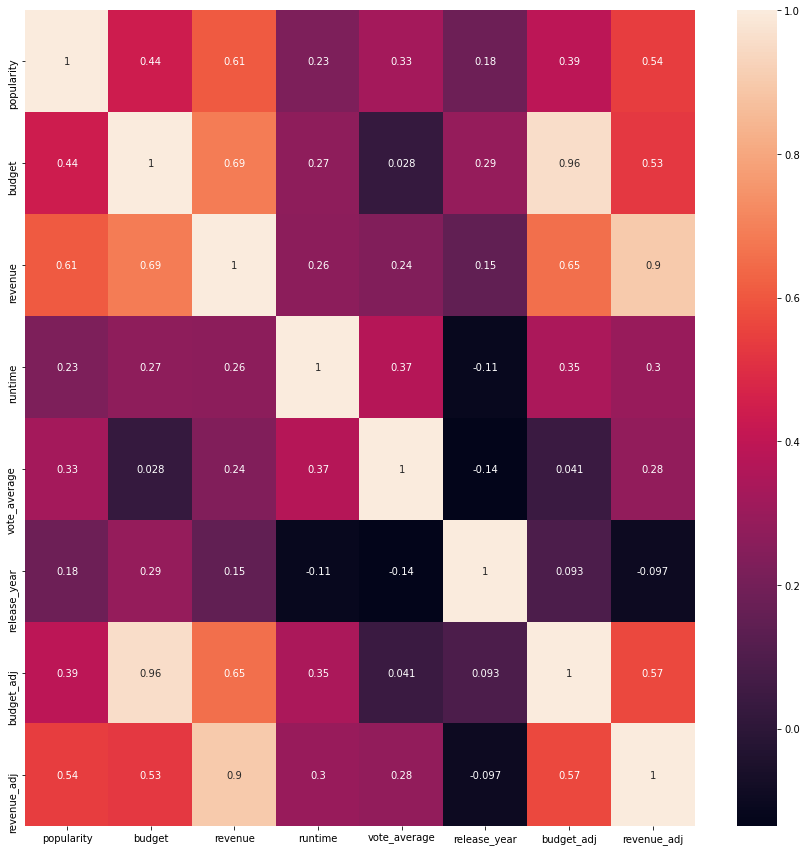

In [21]:
plt.figure(figsize=(15,15))
sns.heatmap(df_copy.corr(),annot=True);

### Research Question 1 (Movies with most and least earned revenue)

In [22]:
df_revenue=df_copy[['original_title','revenue']].sort_values(by='revenue',ascending=False)
df_revenue.head()

,original_title,revenue
1386,Avatar,2.781506e+09
3,Star Wars: The Force Awakens,2.068178e+09
5231,Titanic,1.845034e+09
4361,The Avengers,1.519558e+09
0,Jurassic World,1.513529e+09


In [23]:
df_revenue.tail()

,original_title,revenue
10294,Jason Goes to Hell: The Final Friday,15.0
7158,Chasing Liberty,12.0
8235,Tales from the Hood,11.0
8226,Never Talk to Strangers,6.0
8142,Mallrats,2.0


In [24]:
def barh(width,keys,title,xlabel,n=15):
    
    
    plt.style.use("ggplot")
    plt.figure(figsize=(30,15))
    plt.barh(keys[0:n],width=width[0:n],height=0.6)
    plt.title(title.format(n).title(),fontdict={'fontsize': 30})
    plt.xlabel(xlabel.title(),fontdict={'fontsize': 30})
    plt.tick_params(axis='both',size=5,labelsize =20)
    
    
    
    plt.show()

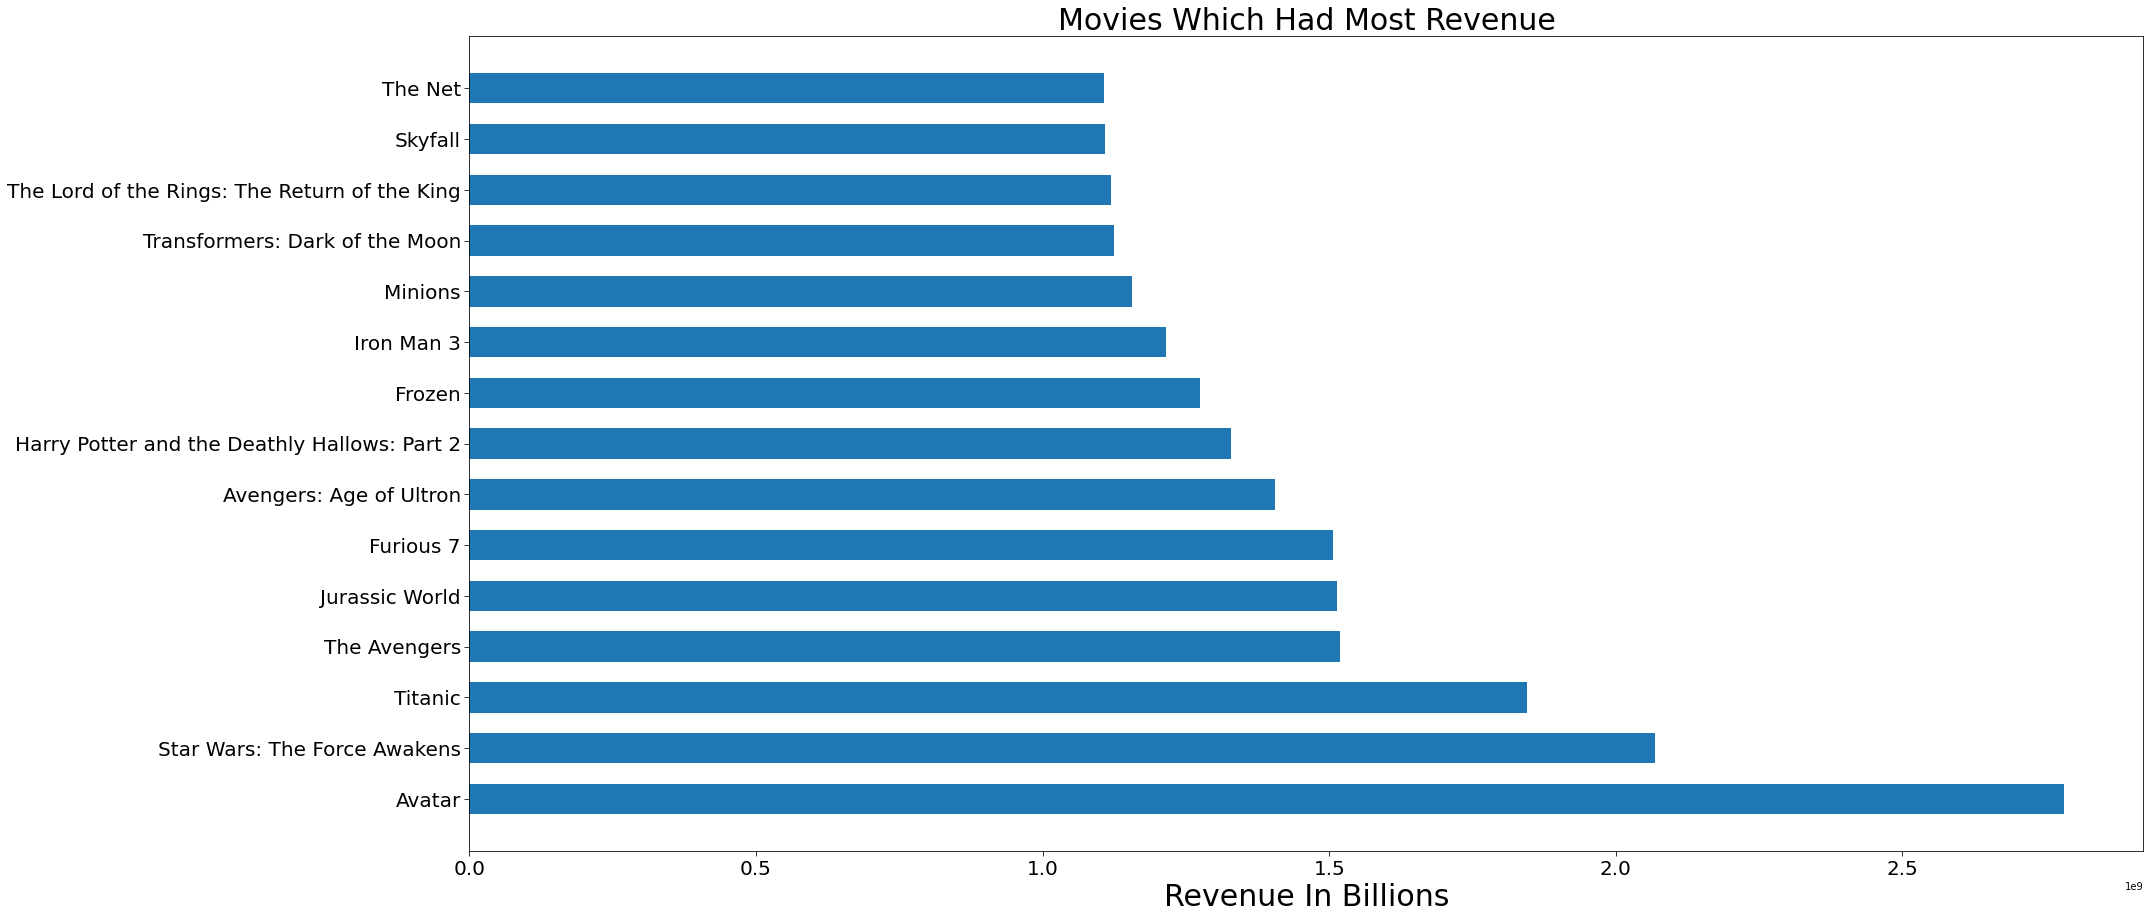

In [25]:
barh(df_revenue.revenue,df_revenue.original_title,'Movies which had most revenue','revenue in billions')

From the above, the movie avatar made the most profit out of all movies from the dataset, its profit is close to double the profit earn by 'the Net' on top 10 from the list.

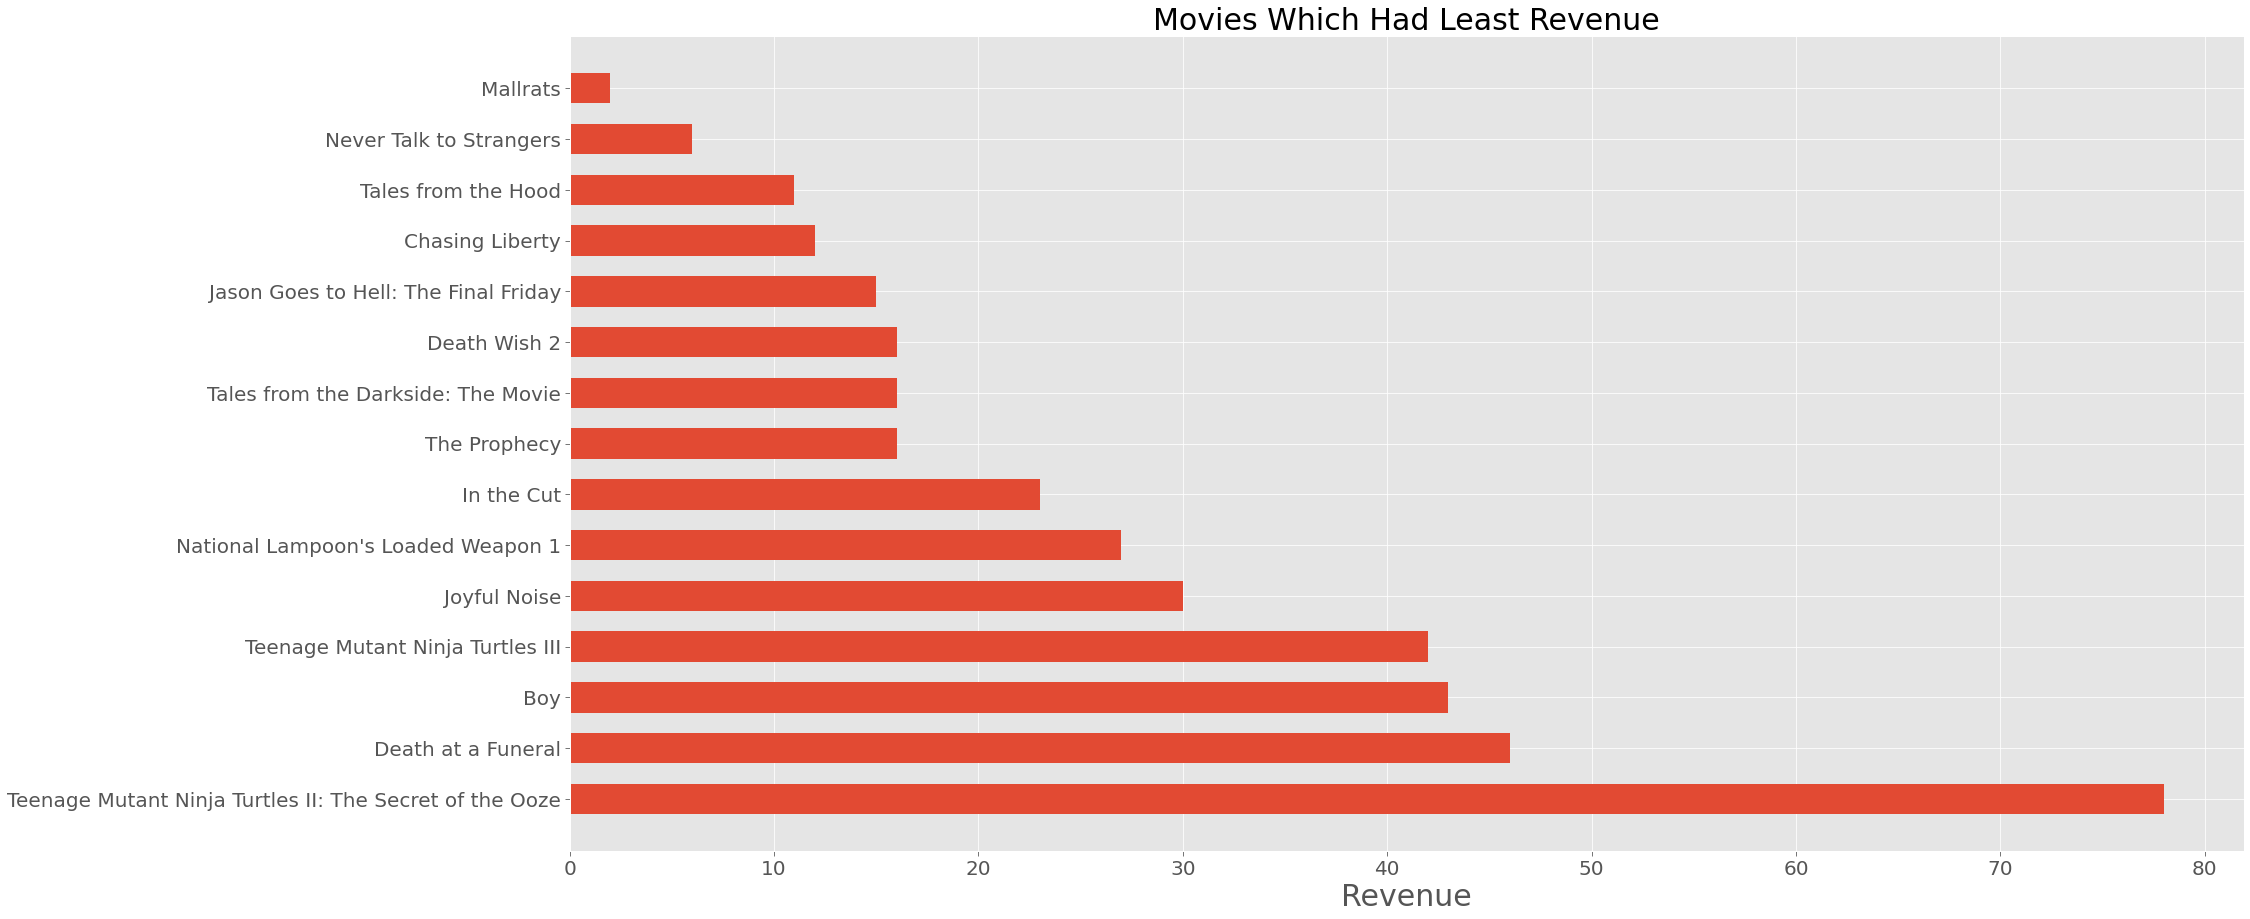

In [26]:
barh(df_revenue.revenue.tail(15),df_revenue.original_title.tail(15),'Movies which had least revenue','revenue')

From the above, the movie mallrats made the least profit out of all movies from the dataset.

### Research Question 2  (Movies with largest and lowest budgets)

In [27]:
df_budget=df_copy[['original_title','budget']].sort_values(by='budget',ascending=False)
df_budget.head()

,original_title,budget
2244,The Warrior's Way,425000000.0
3375,Pirates of the Caribbean: On Stranger Tides,380000000.0
7387,Pirates of the Caribbean: At World's End,300000000.0
14,Avengers: Age of Ultron,280000000.0
4411,John Carter,260000000.0


In [28]:
df_budget.tail()

,original_title,budget
10050,Tales from the Darkside: The Movie,3.0
2398,Boy,3.0
8944,Death Wish 2,2.0
3581,"Love, Wedding, Marriage",1.0
2618,Lost & Found,1.0


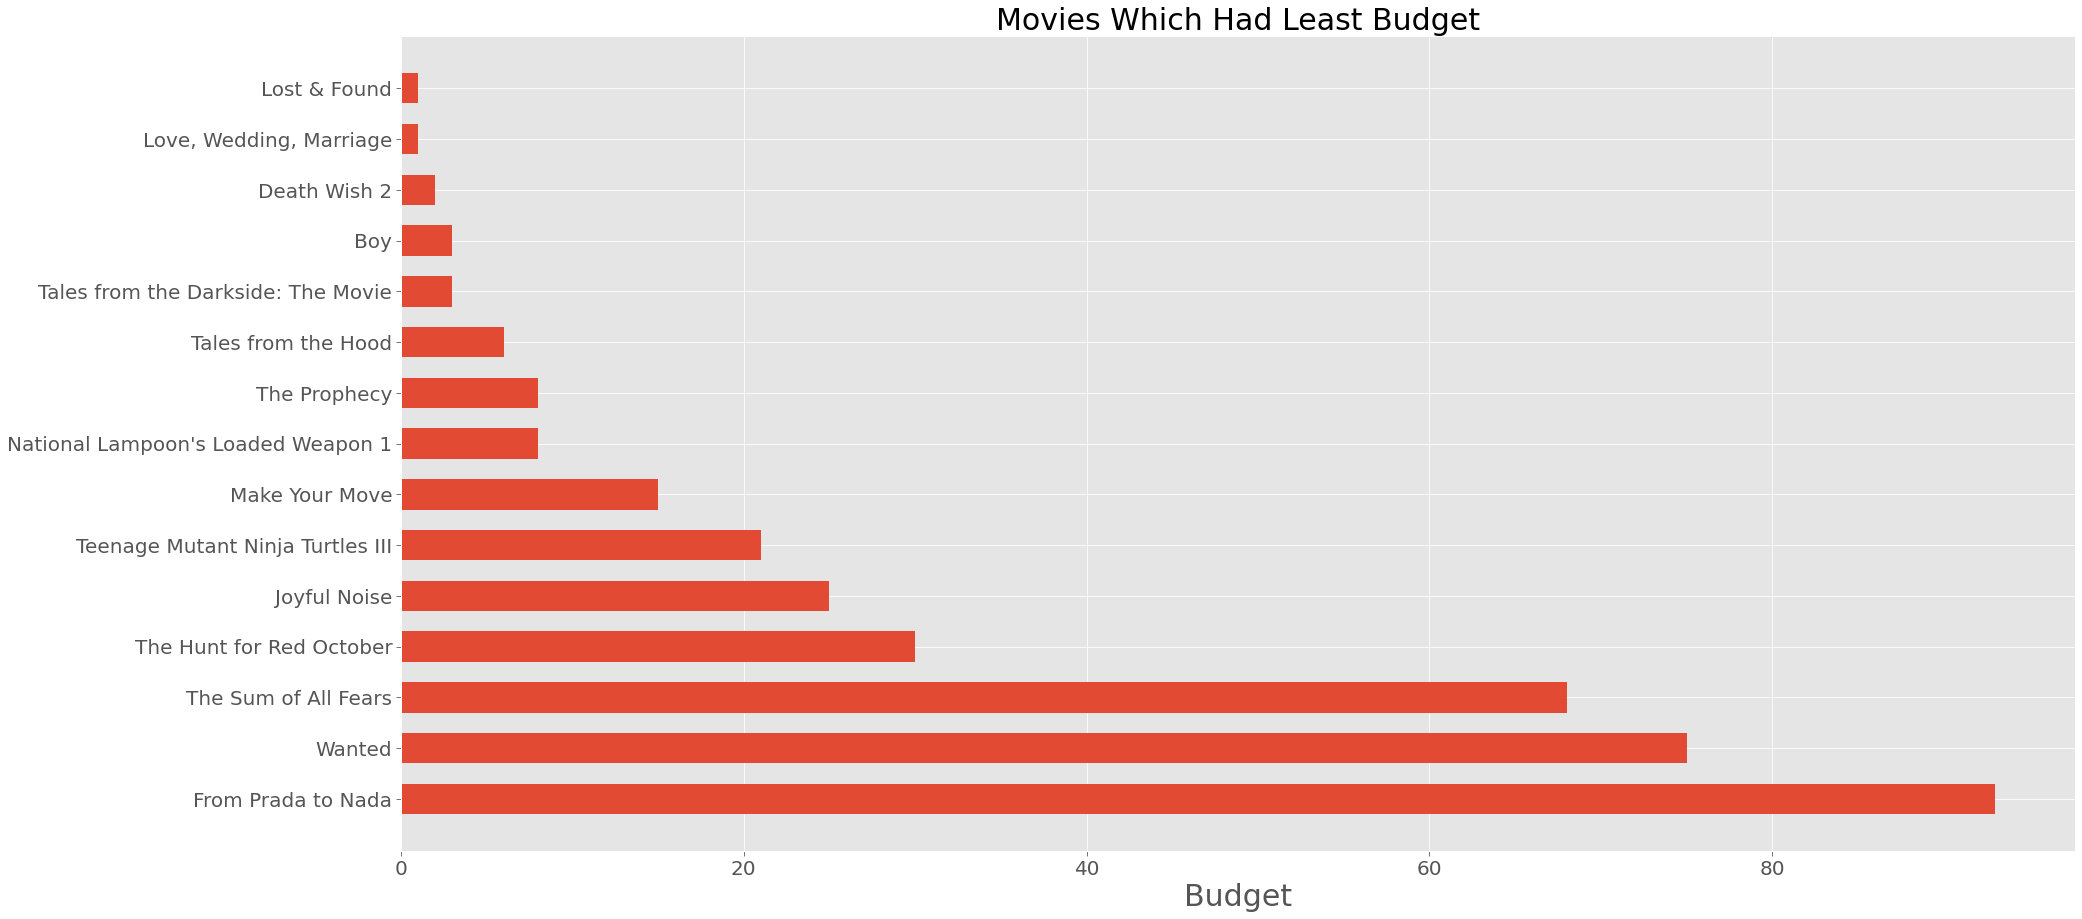

In [29]:
barh(df_budget.budget.tail(15),df_budget.original_title.tail(15),'Movies which had least budget','budget')

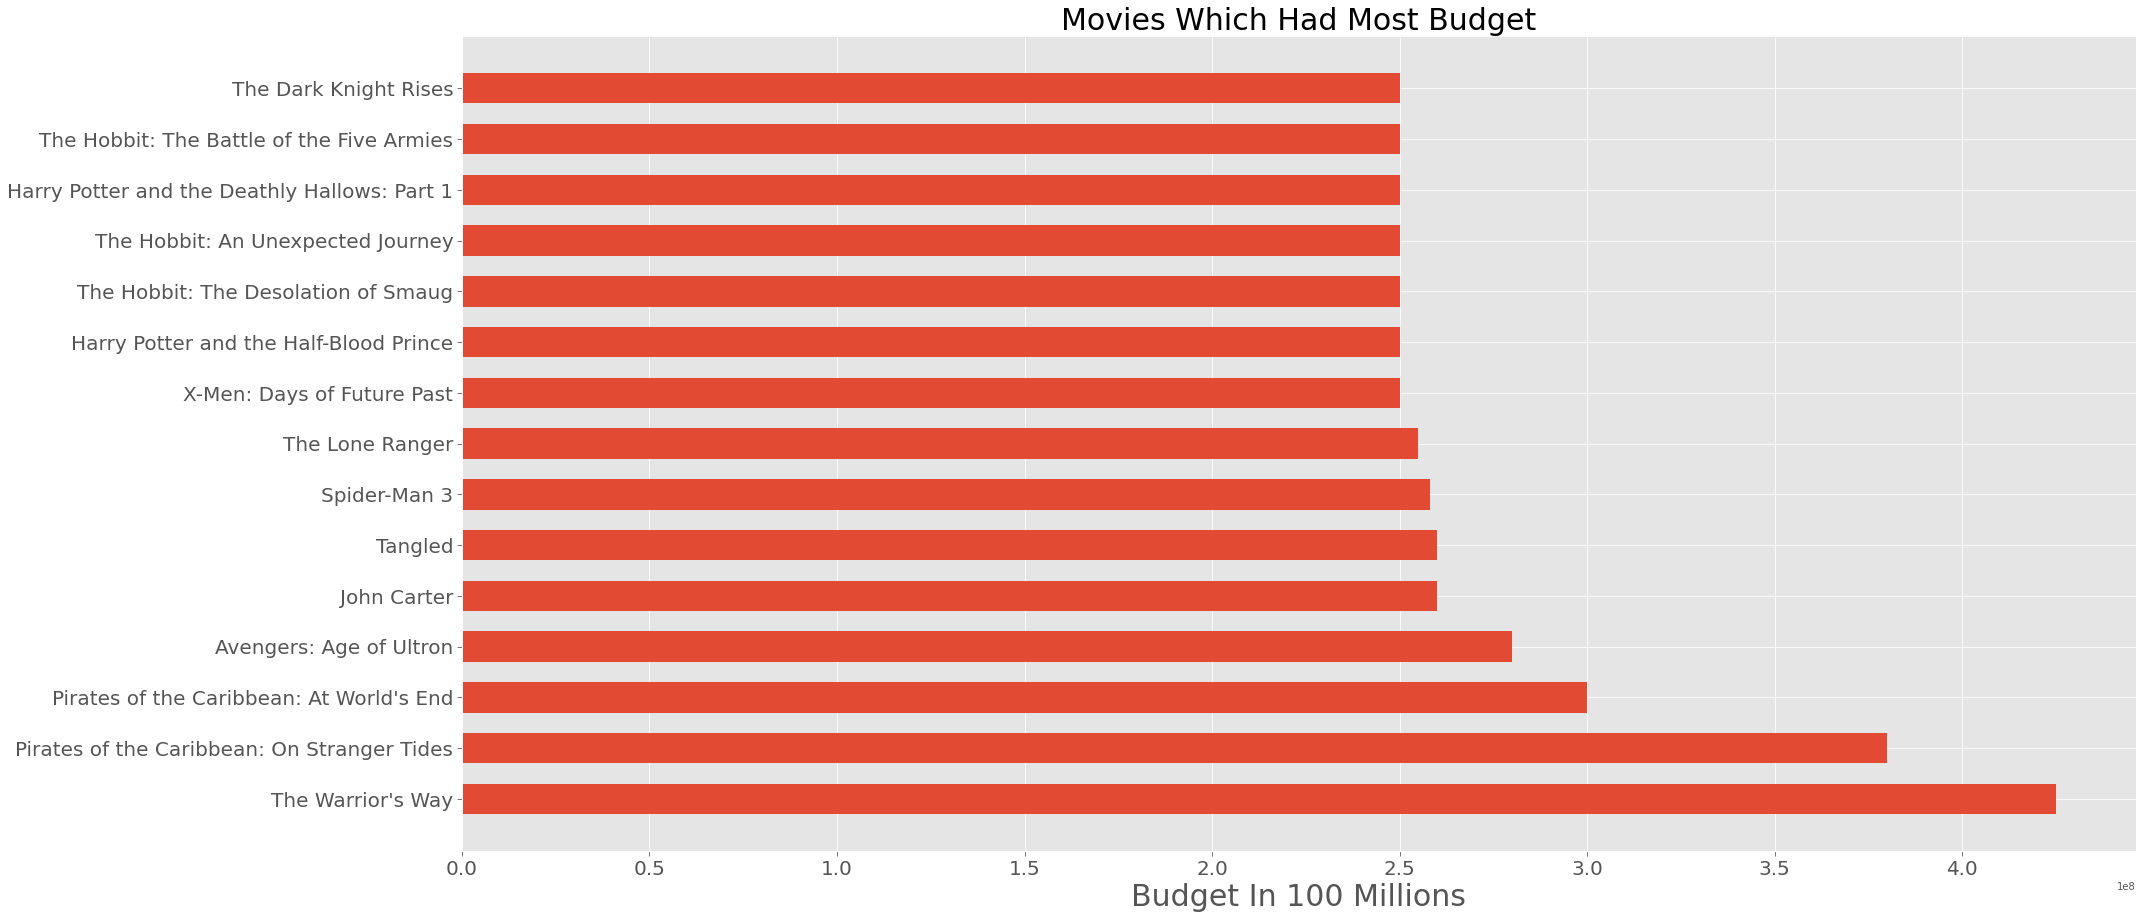

In [30]:
barh(df_budget.budget,df_budget.original_title,'Movies which had most budget','budget in 100 millions')

### Research Question 3  (Movies which had most and least profit)

In [31]:
df_profit=df_copy.copy()
df_profit['profit']=df_profit.revenue-df_profit.budget
df_profit=df_profit.sort_values(by='profit',ascending=False)

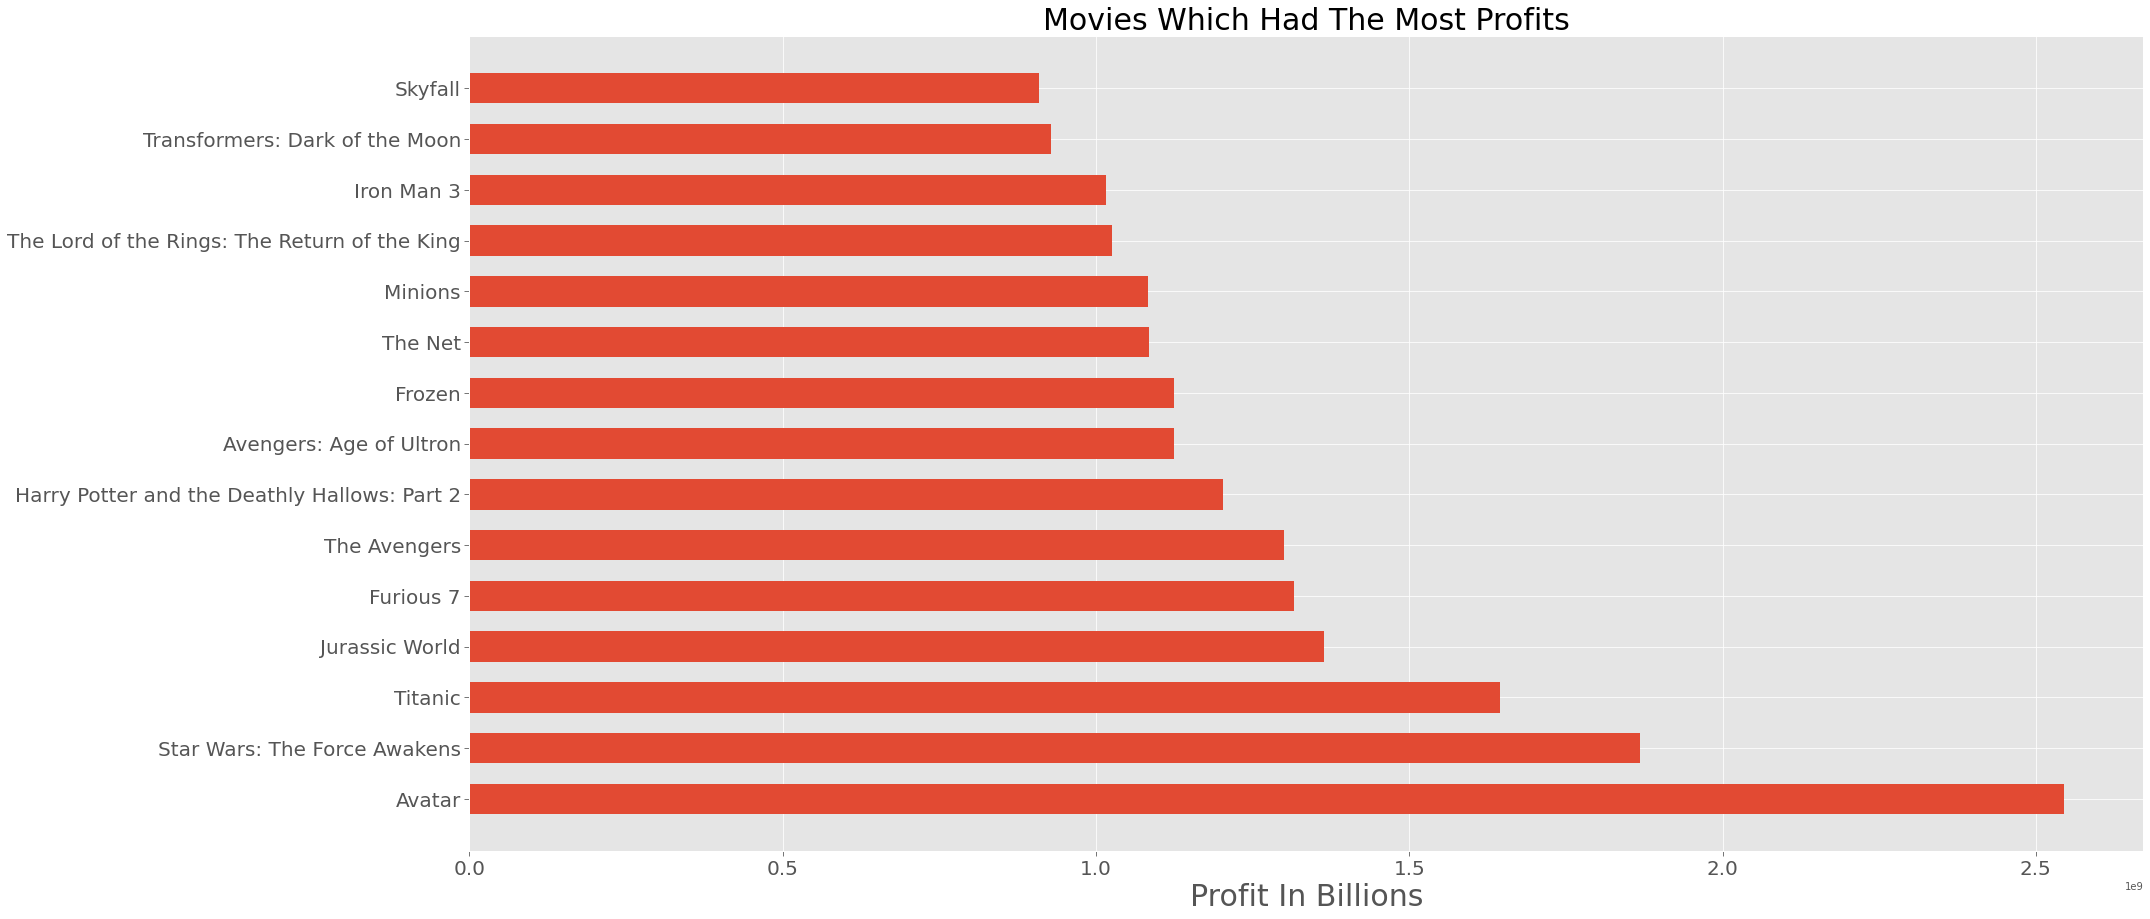

In [32]:
barh(df_profit.profit,df_profit.original_title,'Movies which had the most profits','profit in billions')

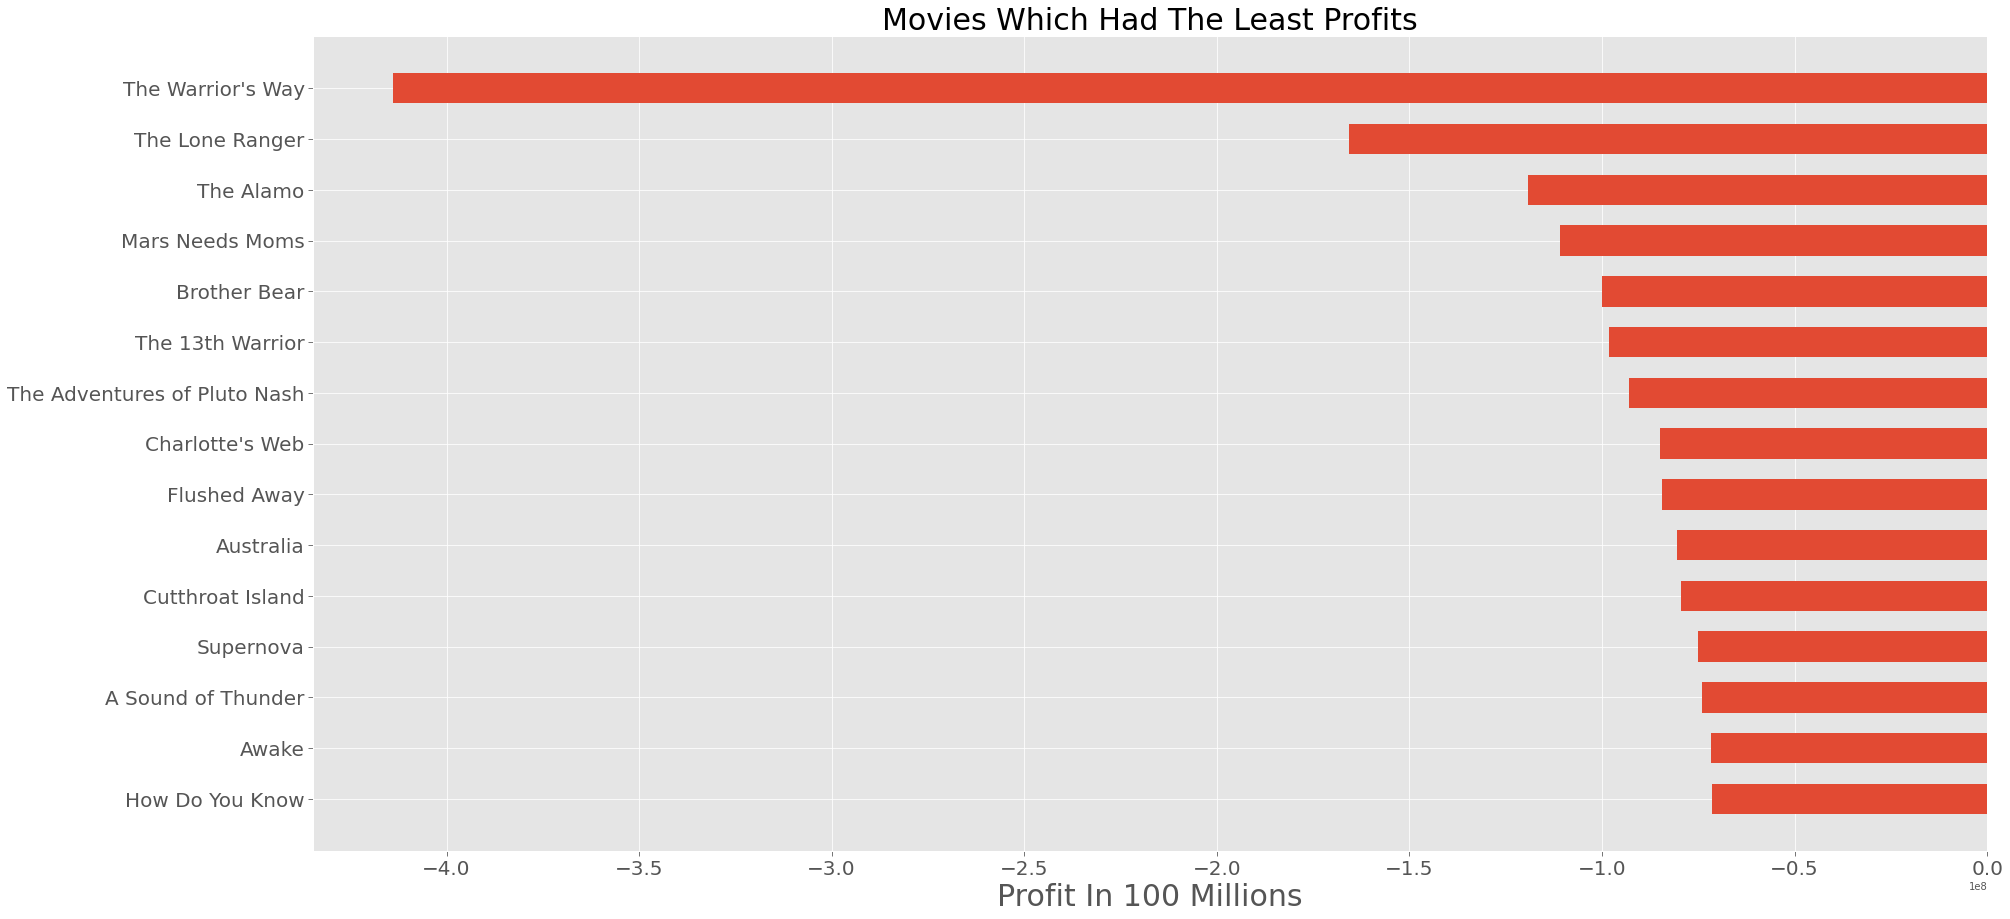

In [33]:
barh(df_profit.profit.tail(15),df_profit.original_title.tail(15),'Movies which had the least profits','profit in 100 millions')

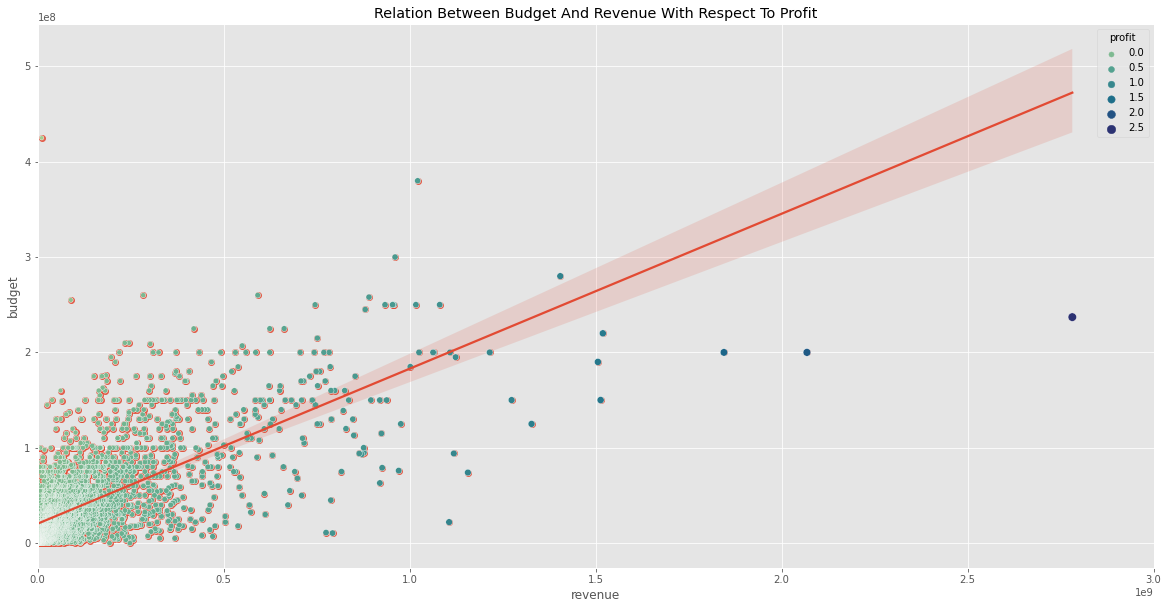

In [62]:
plt.figure(figsize=(20,10))
plt.title("relation between budget and revenue with respect to profit".title())
sns.regplot(x=df_profit['revenue'],y=df_profit['budget'])
sns.scatterplot(data=df_profit,x="revenue",y="budget",size='profit',hue='profit',palette='crest');
plt.xlim(0,3e9);


From the scatter plot, it can be concluded that there is a positive relationship between budget and revenue. The trend line is on a uphill direction and the correlation coefficient value is calculated to be positive.


### Research Question 4 (Movies with longest and shortest runtime values)

In [35]:
df_runtime=df_copy[['original_title','runtime']].sort_values(by='runtime',ascending=False)
df_runtime.head()

,original_title,runtime
2107,Carlos,338.0
10443,Cleopatra,248.0
7332,Heaven's Gate,219.0
9850,Lawrence of Arabia,216.0
5065,Gods and Generals,214.0


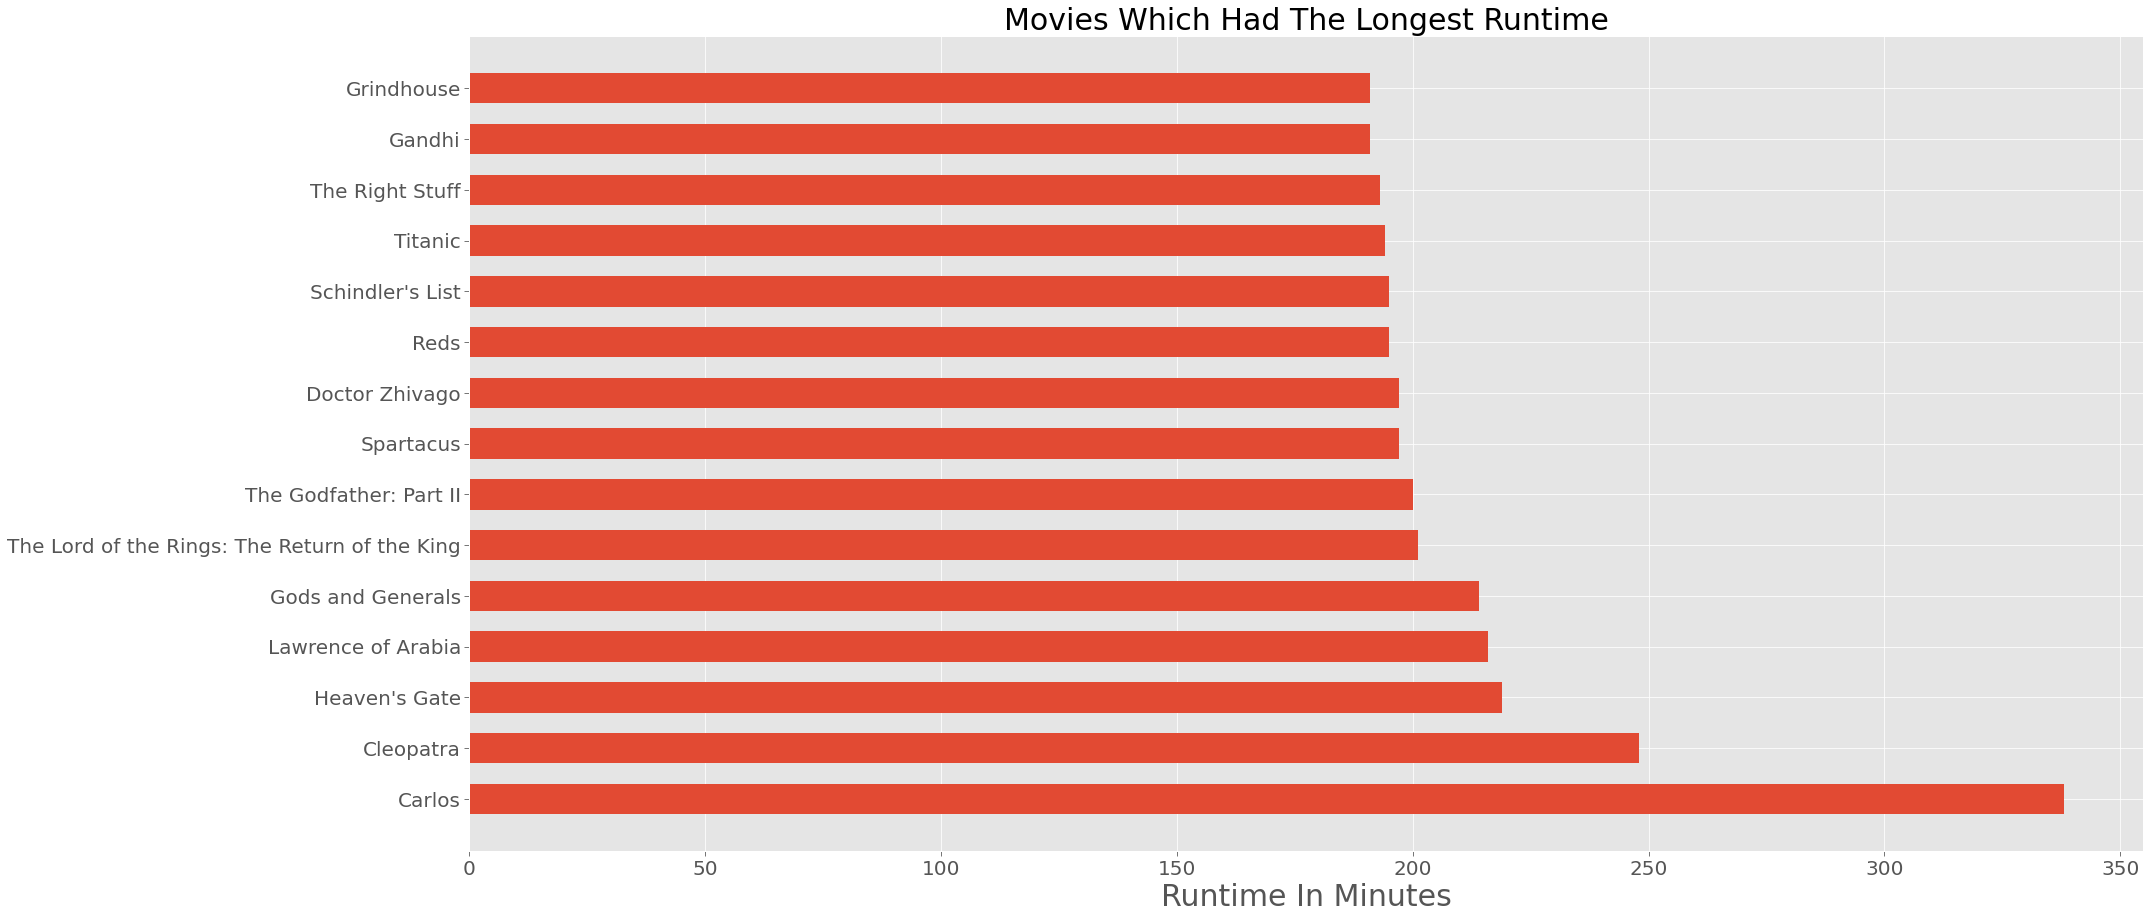

In [36]:
barh(df_runtime.runtime,df_runtime.original_title,'Movies which had the longest runtime','runtime in minutes')

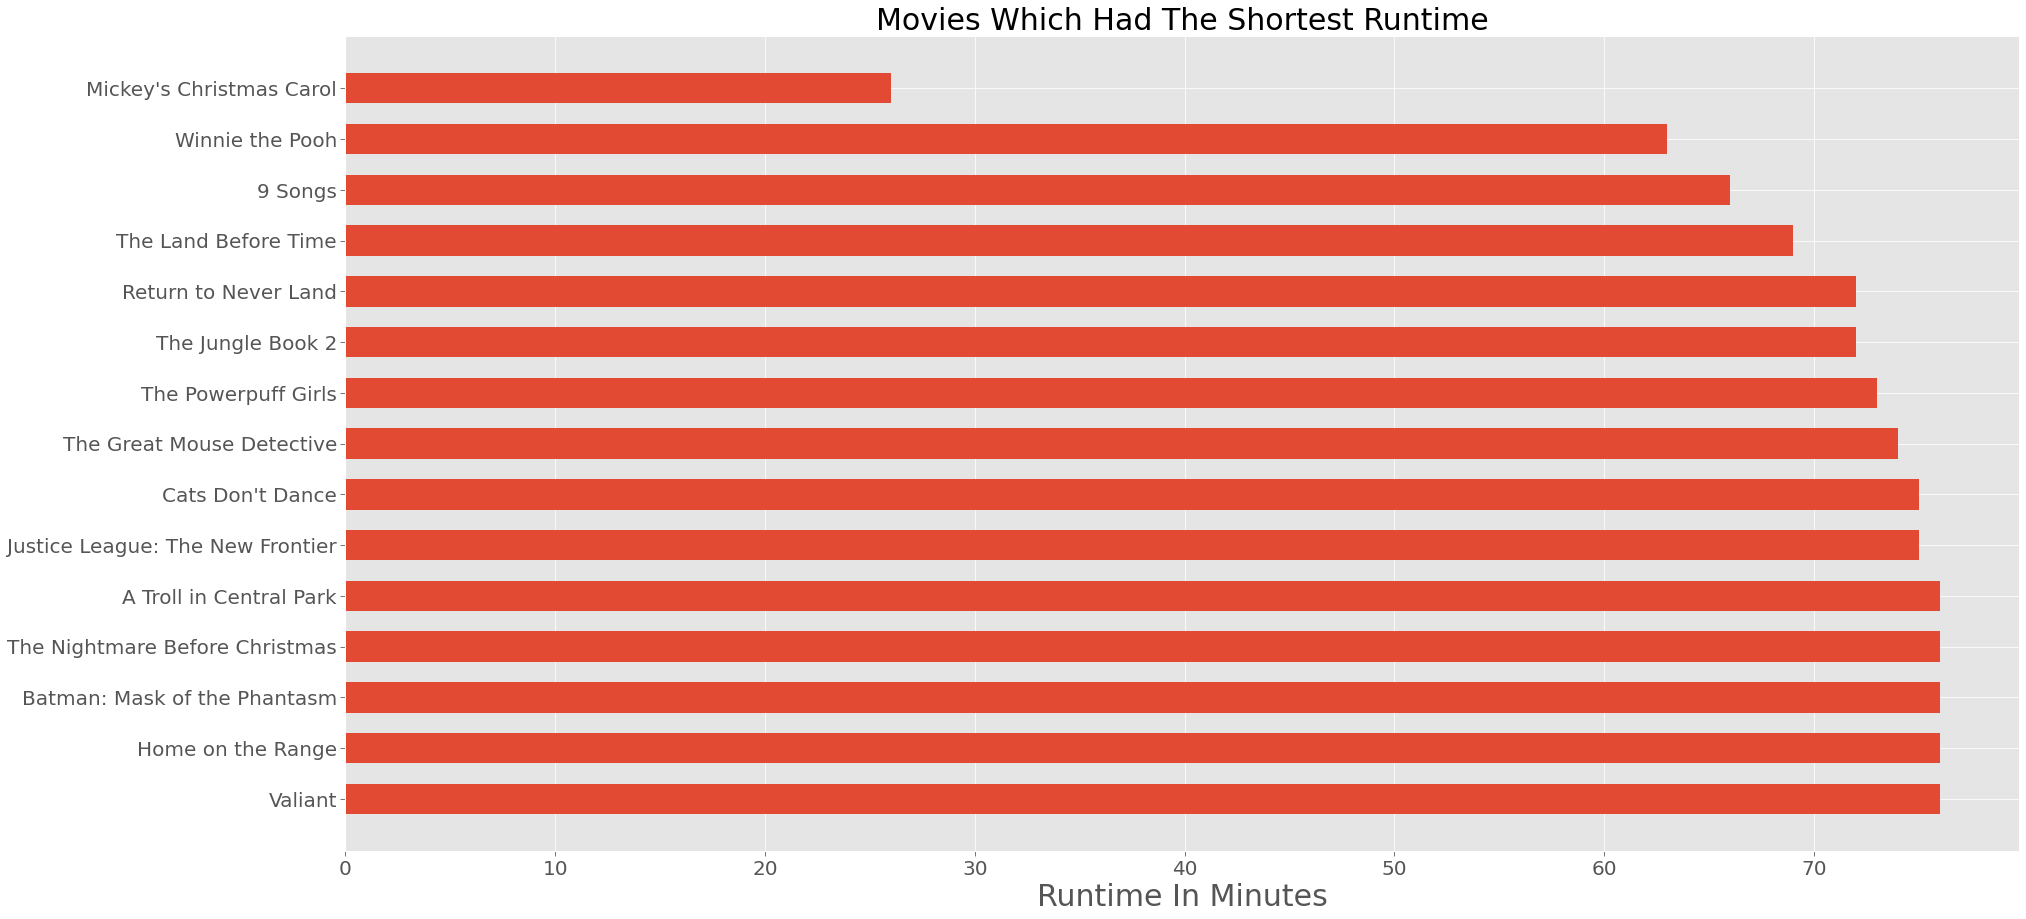

In [37]:
barh(df_runtime.runtime.tail(15),df_runtime.original_title.tail(15),'Movies which had the shortest runtime','runtime in minutes')

### Research Question 5 (Average runtime of all the movies)

In [38]:
#Average runtime of all the movies
df_copy.runtime.mean()

109.23955981941309

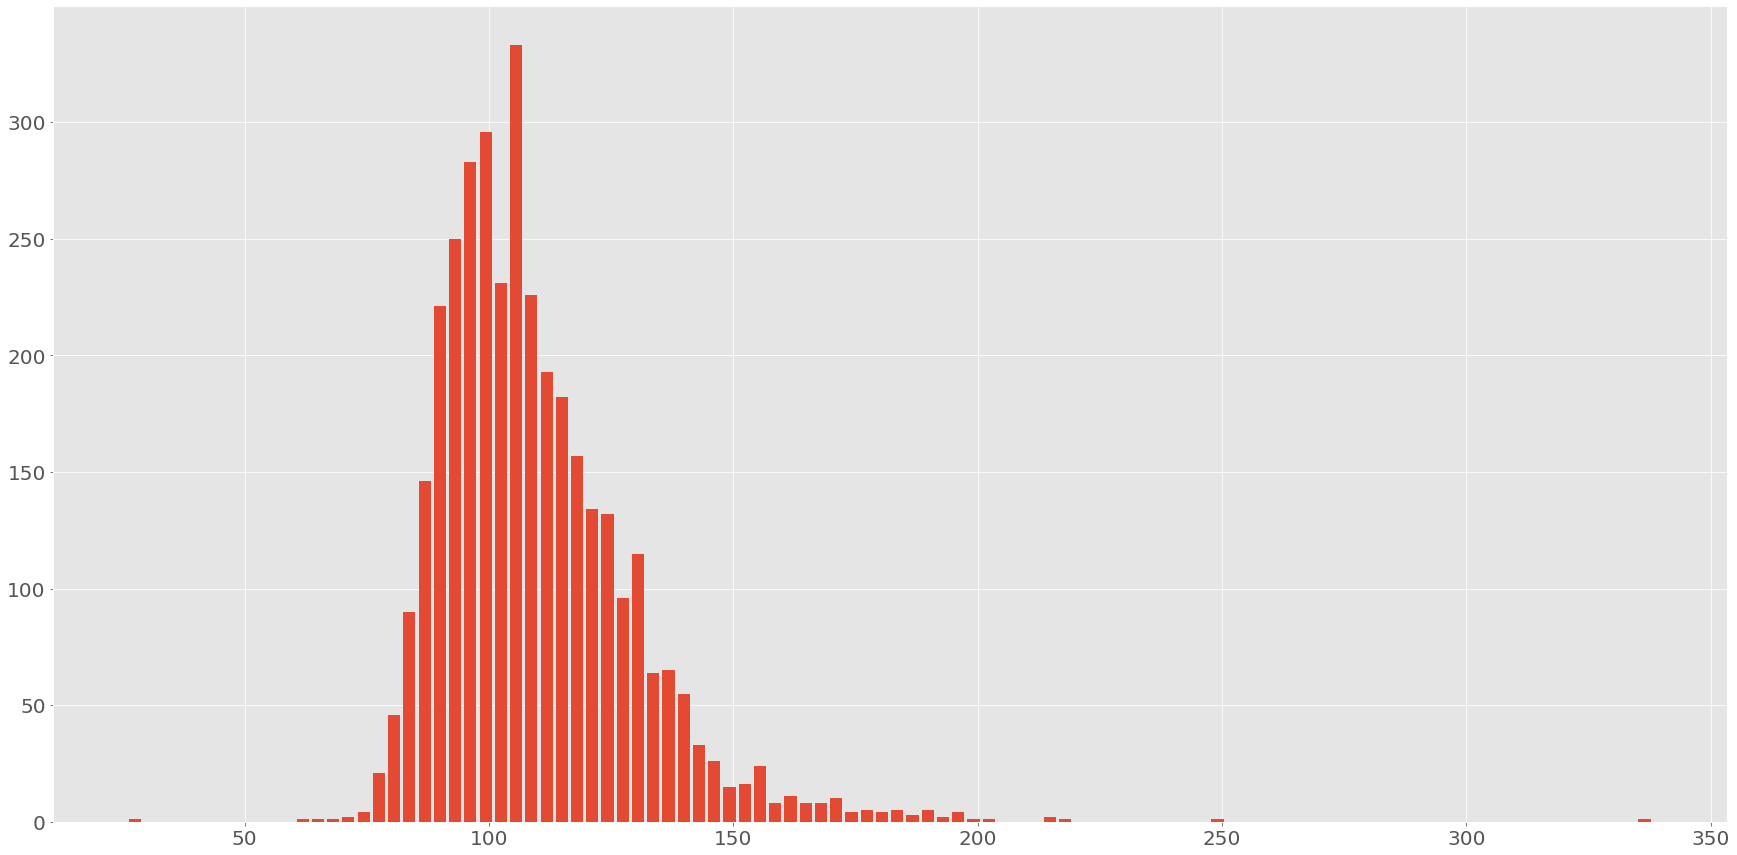

In [39]:
#runtime distribution of all the movies

df_copy.runtime.hist(bins=100,figsize=(30,15),xlabelsize=20,ylabelsize=20,rwidth = 0.8);

the dist plot shows that the average runtime around 100 and  110 min.


### Research Question 5 (In which year we had most no.of budget ,revenue and profitable movies.)

In [40]:

invest_year=df_profit.groupby('release_year')[['profit','budget' ,'revenue']].sum()
invest_year.head()

,profit,budget,revenue
release_year,,,
1960,104098052.0,17806948.0,121905000.0
1961,300783188.0,32637000.0,333420188.0
1962,166879846.0,39450000.0,206329846.0
1963,115411882.0,61115000.0,176526882.0
1964,294678387.0,33935161.0,328613548.0


In [41]:
def invest_plot(data,col,scale):
    plt.figure(figsize=(30,15))
    plt.title("total movies {} per year".format(col).title(),fontdict={'fontsize': 30})
    plt.xlabel("Year".title(),fontdict={'fontsize': 30})
    plt.ylabel("{} in {}".format(col,scale).title(),fontdict={'fontsize': 30})

    plt.tick_params(axis='both',size=5,labelsize =20)
    sns.lineplot(data=data[[col]]);

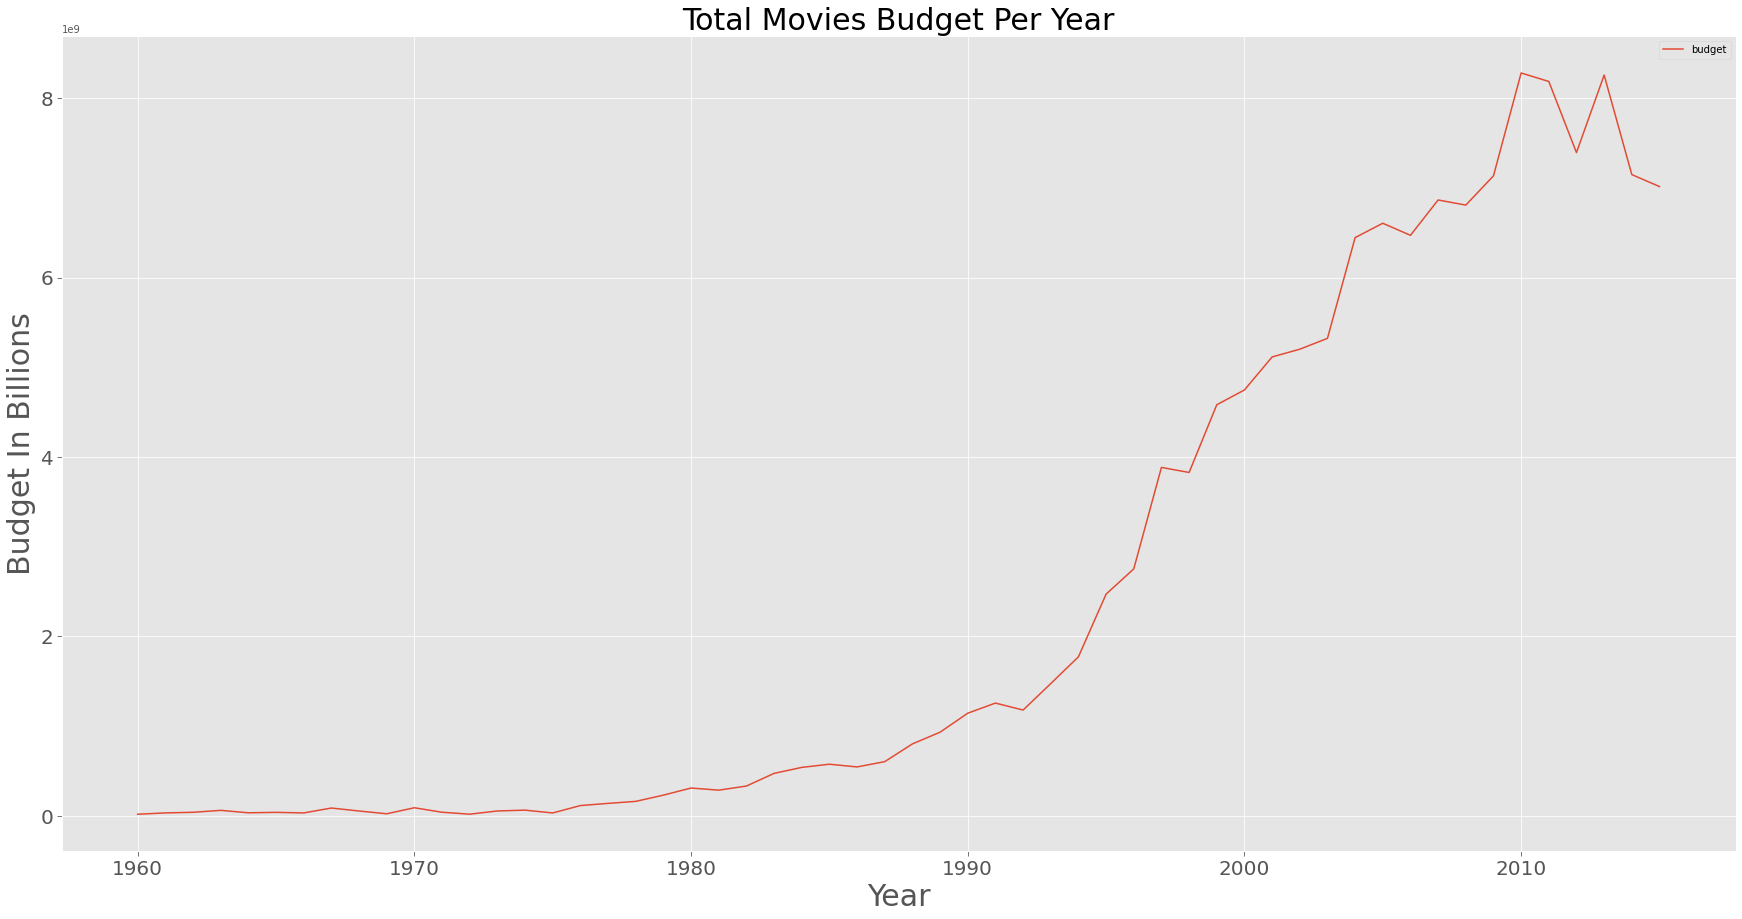

In [42]:
invest_plot(data=invest_year,col='budget',scale="billions")

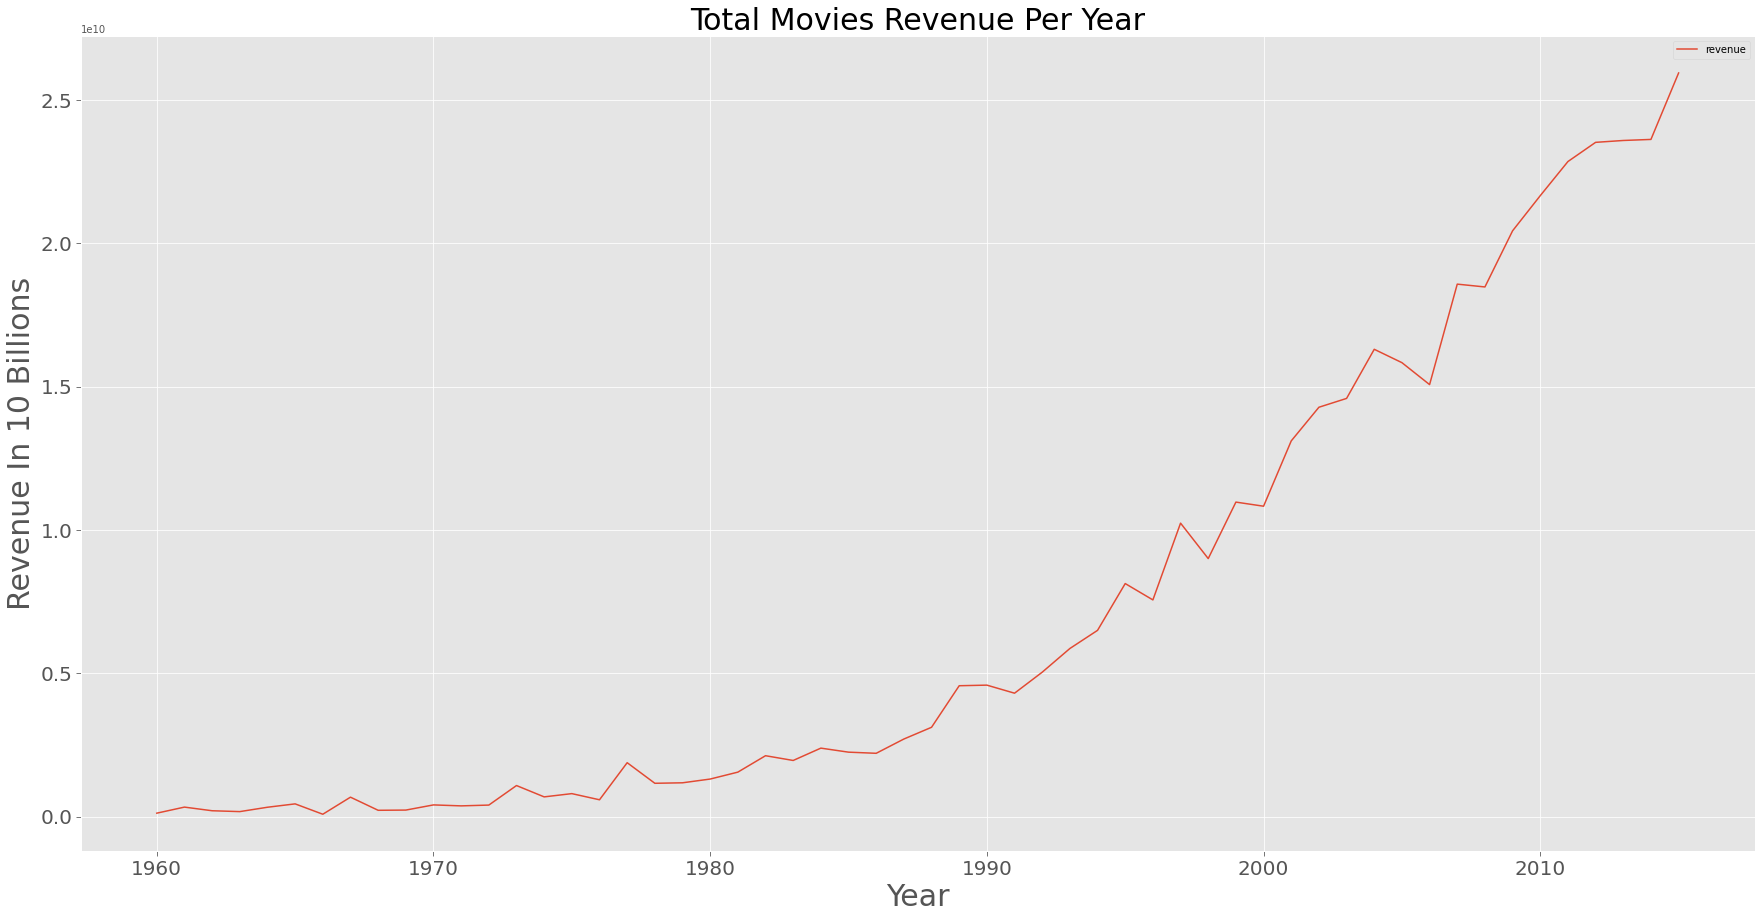

In [43]:
invest_plot(data=invest_year,col='revenue',scale="10 billions")

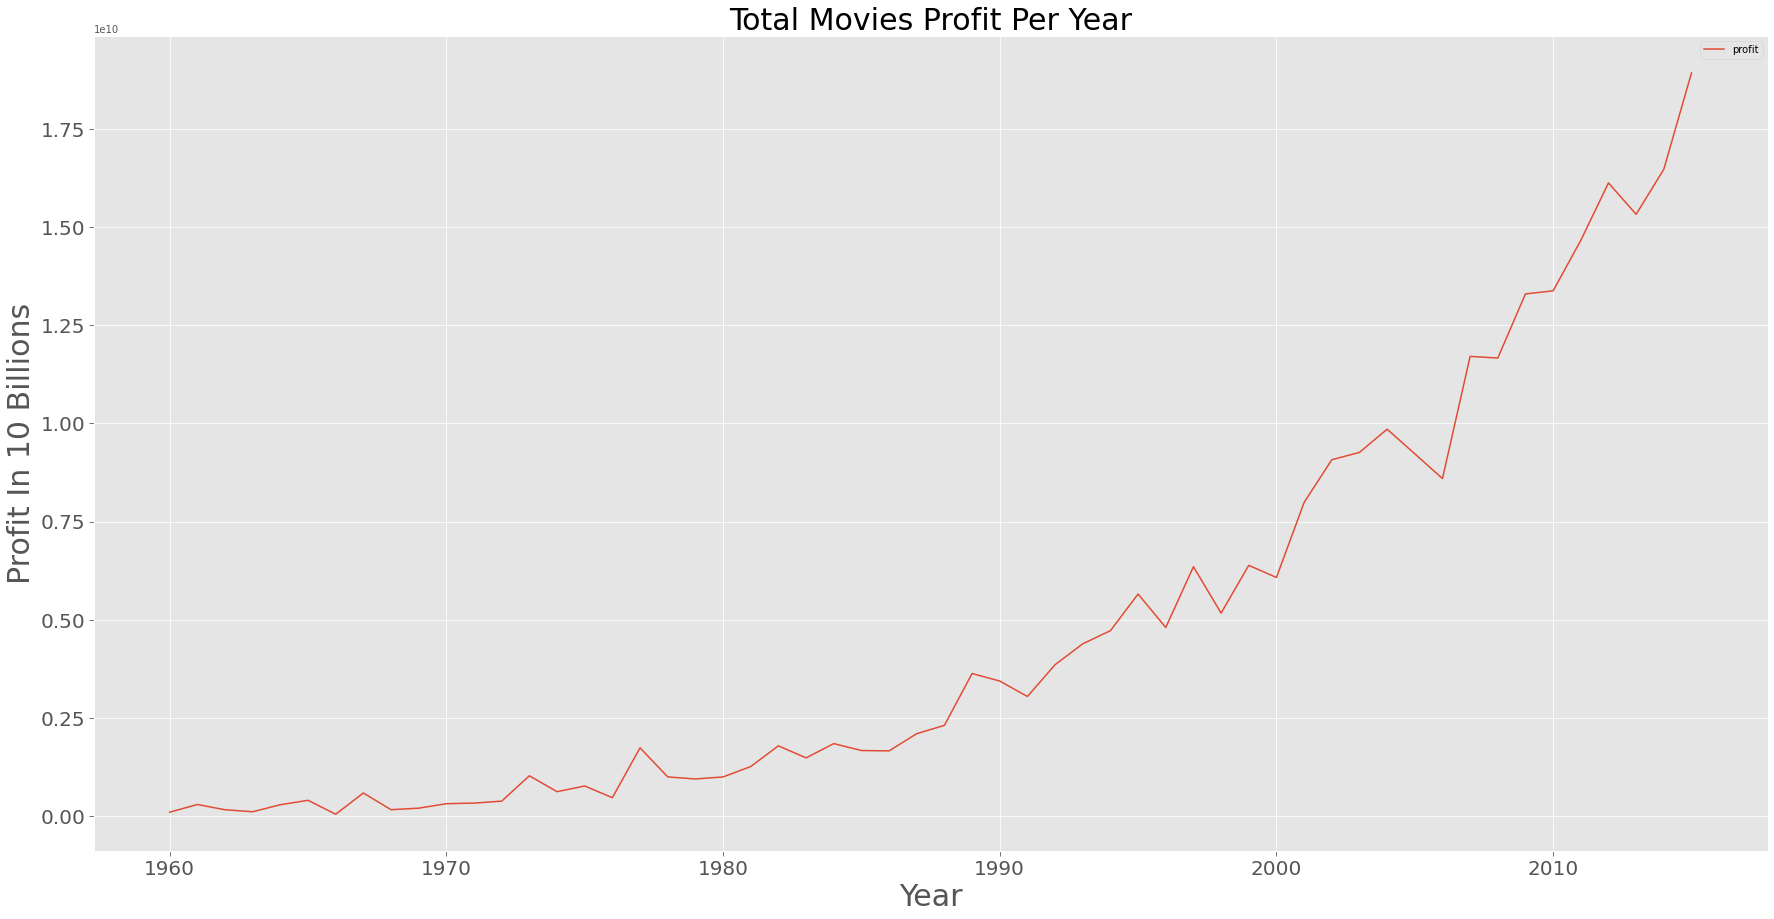

In [44]:
invest_plot(data=invest_year,col='profit',scale="10 billions")

The profit and budgets have silmilar trends over the years. Both increases and peak at about year 2010.

### Research Question 6 (What are the top casts, directors and genres?)

In [45]:
def extract_data(column):
    #will take a column, and separate the string by '|'
    data = df_profit[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #arranging in descending order
    count = data.value_counts(ascending = False)
    
    return count


In [46]:
def data_plot(data,col,n=30):
    plt.figure(figsize=(30,15))
    plt.title("{} counts".format(col).title(),fontdict={'fontsize': 30})
    plt.xlabel("count".title(),fontdict={'fontsize': 30})
    plt.ylabel("{}".format(col).title(),fontdict={'fontsize': 40})

    plt.tick_params(axis='both',size=5,labelsize =20)
    sns.barplot(data[0:n],data.keys()[0:n]);

In [47]:
genres=extract_data('genres')
genres.head()

Drama        1561
Comedy       1240
Thriller     1143
Action       1039
Adventure     714
dtype: int64

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


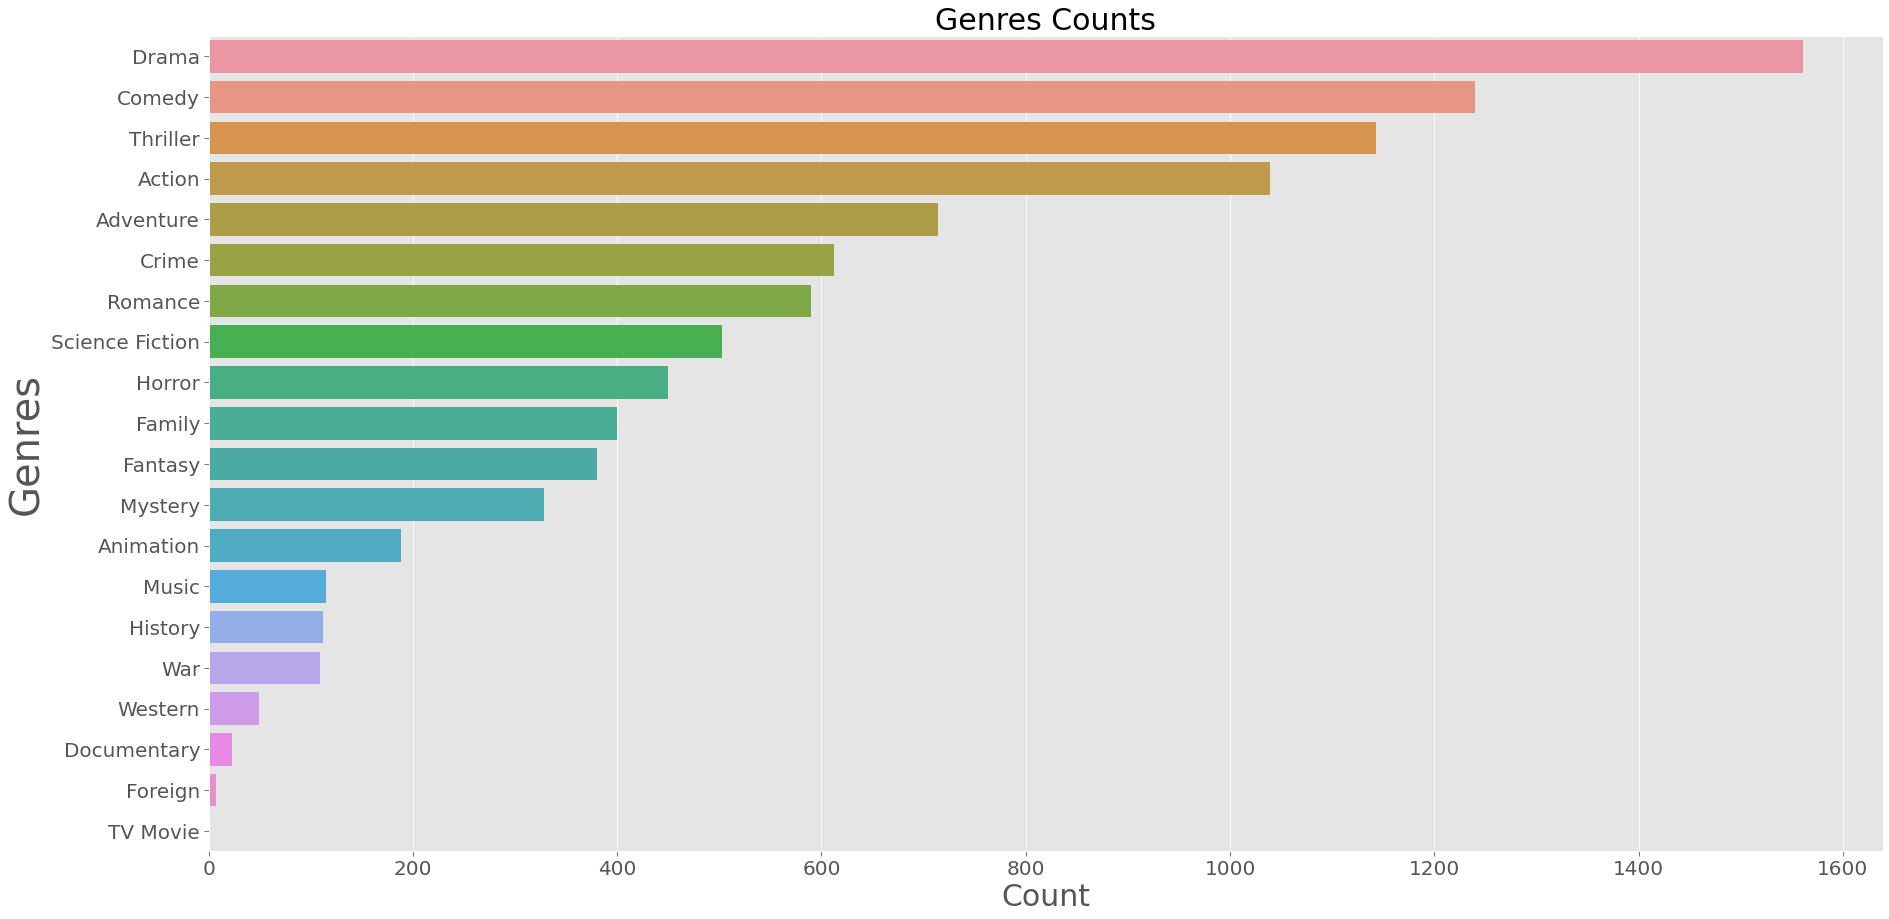

In [48]:
data_plot(data=genres,col='genres')

drama is the most common genre

In [49]:
cast=extract_data('cast')
cast.head()

Robert De Niro       50
Bruce Willis         44
Samuel L. Jackson    43
Nicolas Cage         41
Matt Damon           35
dtype: int64

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


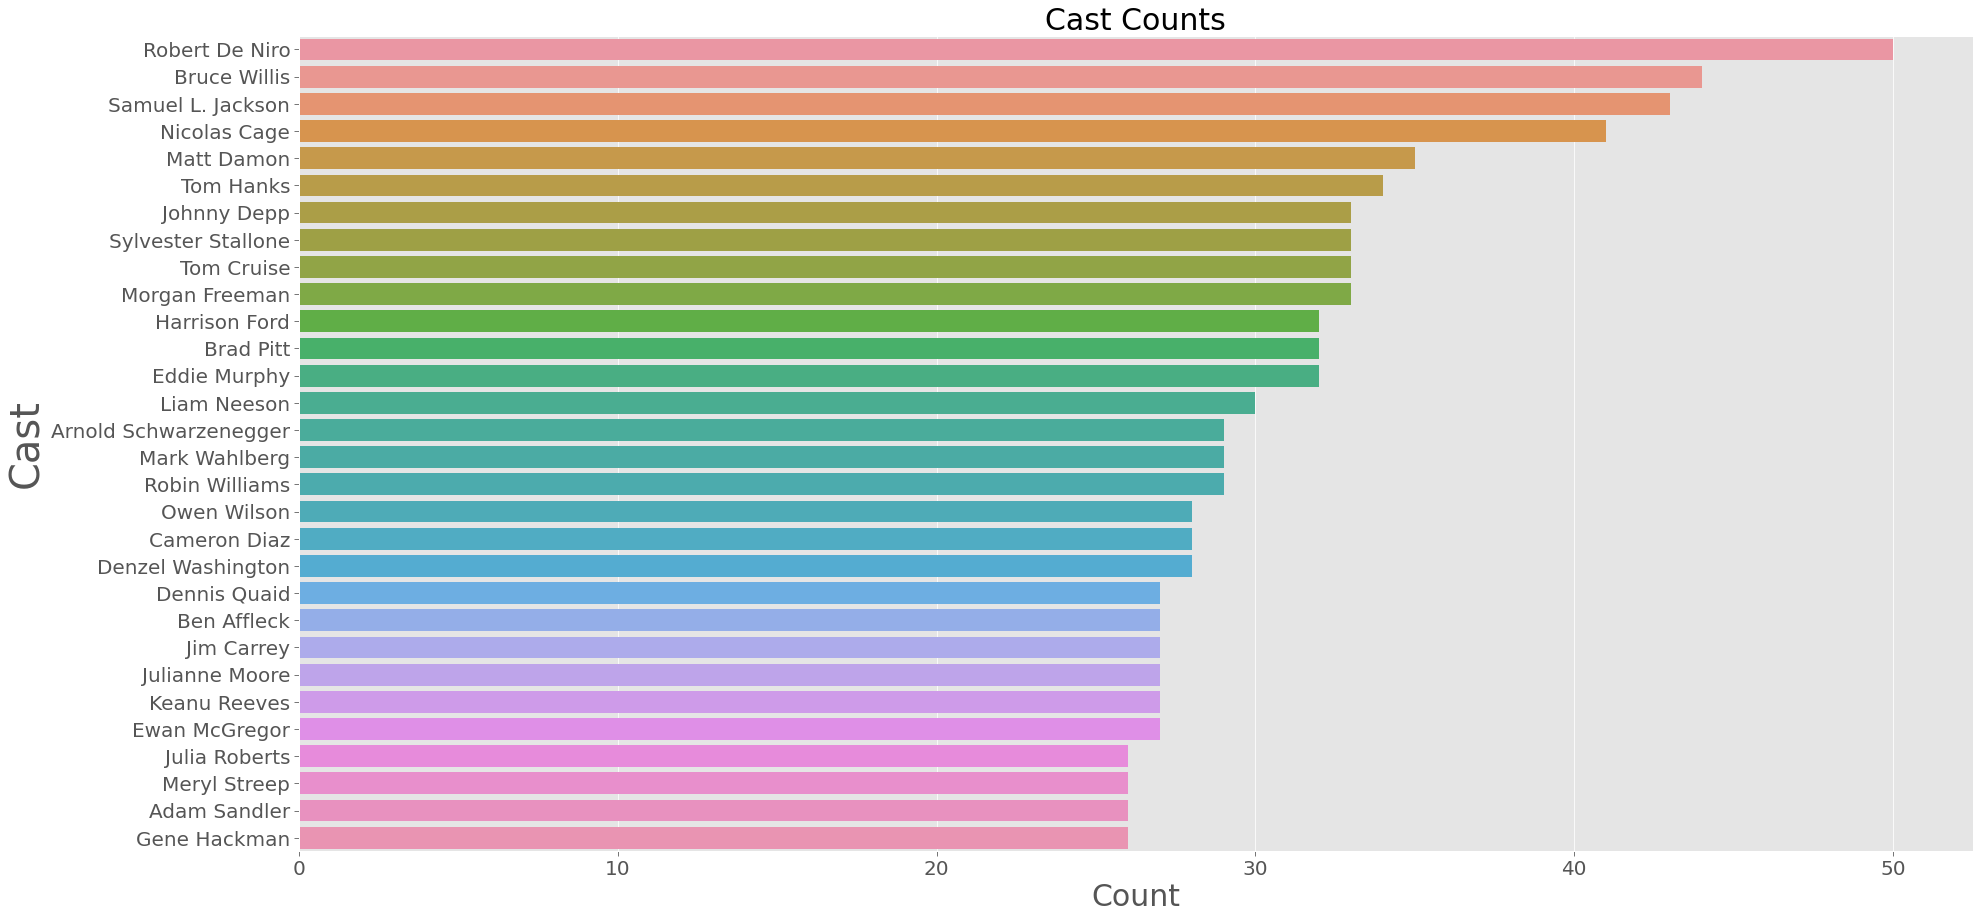

In [50]:
data_plot(data=cast,col='cast')

robert de niro has the most participation in  movies.

In [51]:
directors=extract_data('director')
directors.head()

Steven Spielberg     27
Clint Eastwood       21
Ridley Scott         20
Tim Burton           17
Steven Soderbergh    17
dtype: int64

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


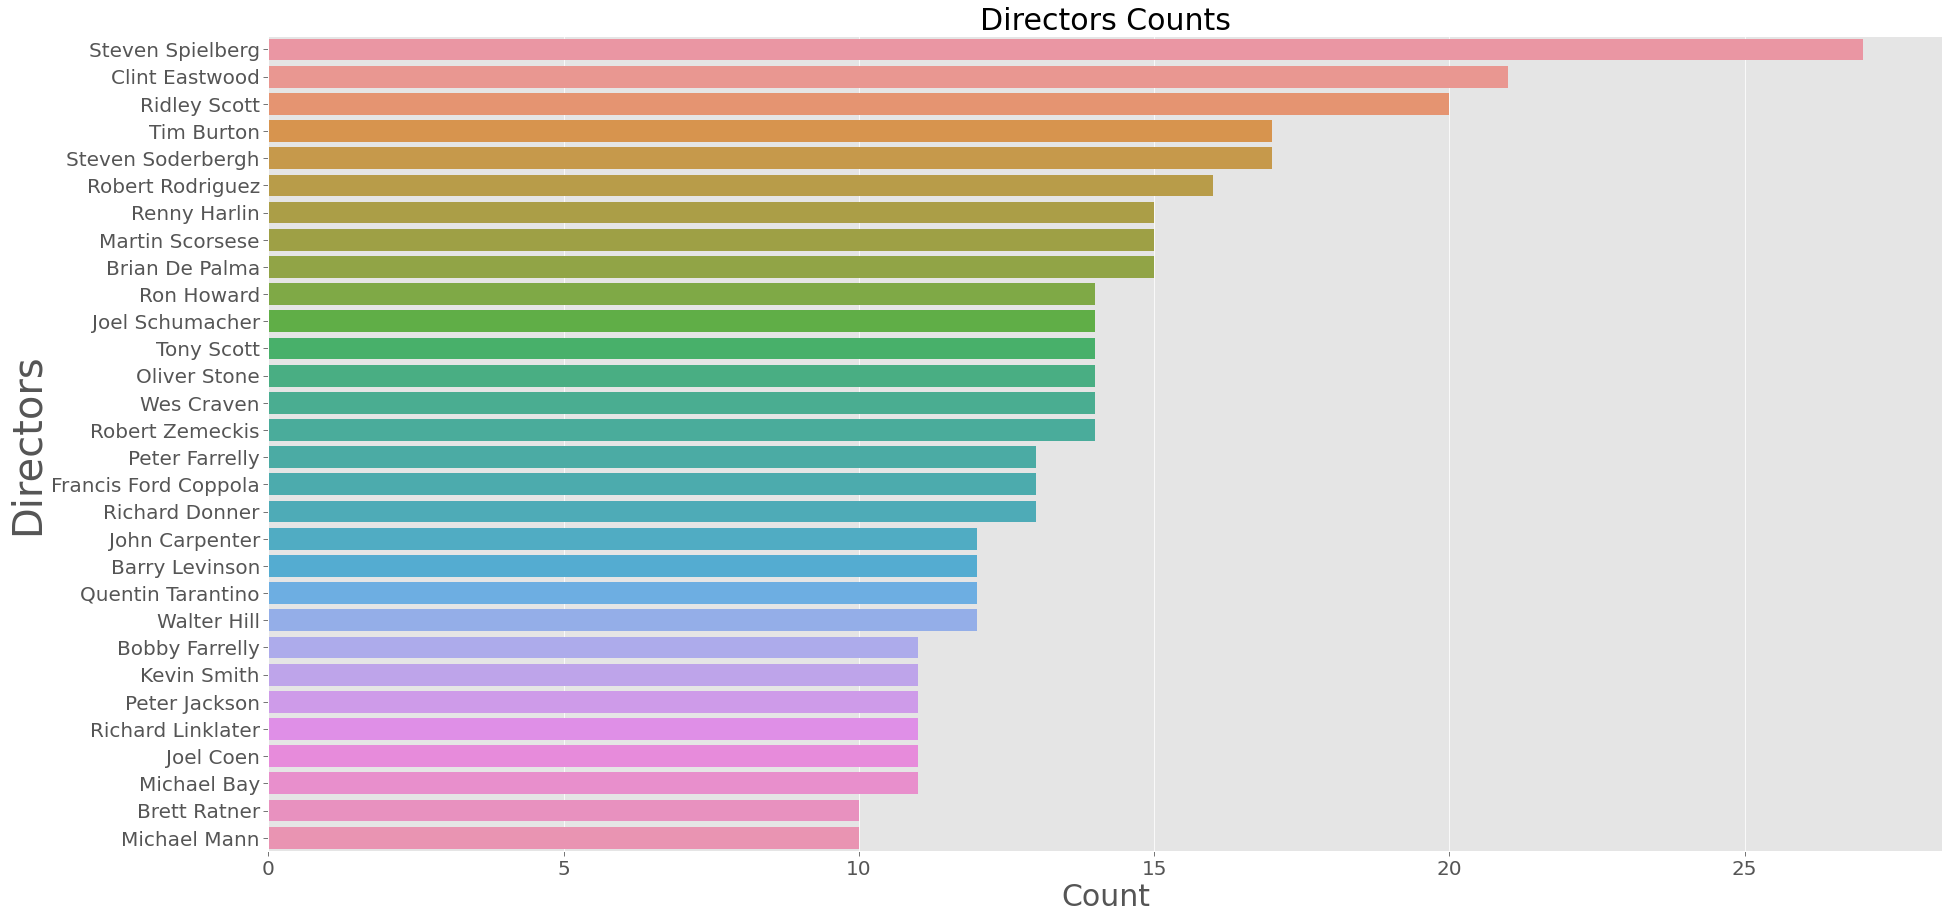

In [52]:
data_plot(data=directors,col='directors')

steven directed over 25 movies

<a id='conclusions'></a>
## Conclusions


The TMDb movie dataset provide many information on all movies. After Data Wrangling, null values, duplicated values and 0 values were removed to provide more accurate results. Also, wrong datatypes were corrected and new column such as profit further analysis.

Line plot, bar chart and histogram are made to help visualize and answer questions. From the results, it showed the top profits, budgets, casts, directors, genres, ect. it also showed the sum profits made by each months. These provide valuable information on which movie characterists attracts more audience and how much more movies are sold compare to each months.

    Profits: profits has positive relationship with budget and popularity
    Runtime: Average of 109.23 minutes from all movies
    
    Top 1 cast: Robert De Niro
    Top 1 director: Steven Spielberg
    Top 1 genre: Drama
    Top 1 movie profits: Avatar
    Top 1 movie revenue: Avatar
## limitations:

We have used TMBD Movies dataset for our analysis and worked with popularity, revenue and runtime. Our analysis is limited to only the provided dataset. For example, the dataset does not confirm that every release of every director is listed.


Dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards the relationship being analyzed. etc.

Also, every movies received different number of votes. Therefore, movies with fewer votes or higher votes would not be accurate. There should be a consistent way to collect the information in order to make it useful for analyzing the data.